Question: What is the probability of a player successfully hitting a UFO at least 3 times in a row in 10 shots, given a 40% probability of success for each individual shot?

Simulation Description:

We model a simplified Atari-style shooting game where a player fires 10 shots at a moving UFO. Each shot has an independent 40% probability of hitting the UFO.

Assumptions:

Each shot is independent of others.

Probability of a hit per shot: p = 0.4

A success is defined as getting at least 3 consecutive hits within 10 shots.

No power-ups, aim improvements, or bonuses are considered.

Random Variables:

Xi: Result of shot i, where Xi = 1 if hit and Xi = 0 if miss.

The sequence of 10 Xi values determines if a streak of 3 or more hits occurs.

Trial Example: Example trial (10 shots): 1, 0, 1, 1, 1, 0, 0, 1, 0, 1 Here, there's a streak of 3 hits in a row, this trial counts as a success.

Outcome Definition:

Success: Player achieves 3 or more consecutive hits in 10 shots.

Failure: Player does not achieve 3 or more consecutive hits in 10 shots.

Initial Probability Estimate:

Before simulation, we can estimate that since each shot has a 40% success rate, the chance of 3 consecutive hits is roughly 0.4^3 = 0.064 for any specific 3-shot segment. However, since there are multiple overlapping segments in 10 shots, the true probability will be higher.

In our simulation of Space Invaders, we estimated the probability of hitting at least three UFOs in a row over 10 shots. Using a per-shot hit probability of 0.4, based on the perceived difficulty of the game and typical player performance, we ran 100 trials.

🏁 Game demo finished! Total reward: 35.00



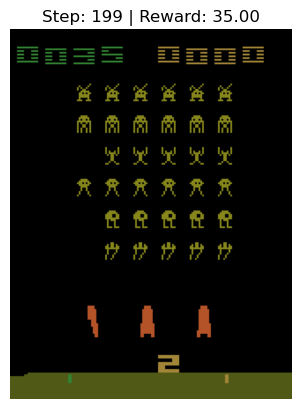

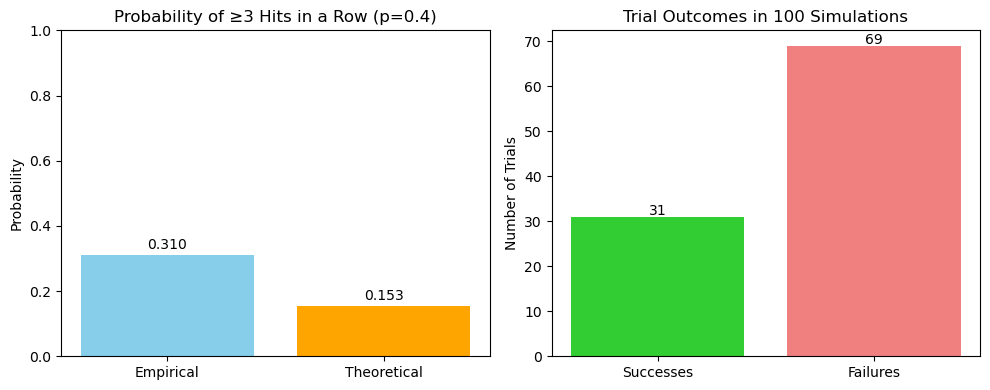

🎯 Empirical probability: 0.310
📘 Theoretical probability: 0.153
✅ Successful trials: 31/100
❌ Failed trials: 69/100

Simulation complete — game auto-played, and both charts displayed afterward!


In [15]:
# Atari UFO Simulation
import gymnasium as gym
import ale_py
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display

# Register ALE environments manually
gym.register_envs(ale_py)
print("ALE and Atari environments registered!\n")

# Part 1: Space Invaders Auto-Play Demo

env = gym.make("ALE/SpaceInvaders-v5", render_mode="rgb_array")
obs, info = env.reset()
total_reward = 0

print("Running automated Space Invaders demo...")

for step in range(200):
    # Random but frequent firing
    action = 1 if np.random.rand() < 0.7 else env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    # Render live
    clear_output(wait=True)
    plt.imshow(obs)
    plt.title(f"Step: {step} | Reward: {total_reward:.2f}")
    plt.axis('off')
    display(plt.gcf())
    time.sleep(0.03)
    
    if terminated or truncated:
        obs, info = env.reset()

# Close environment properly
env.close()
clear_output(wait=True)
print(f"Game demo finished! Total reward: {total_reward:.2f}\n")

# Part 2: Probability Simulation

n_shots = 10        # shots per trial
prob_hit = 0.4      # probability of hitting UFO
n_trials = 100      # number of trials
success_streak = 3  # hitting at least 3 in a row

success_counts = []
for _ in range(n_trials):
    shots = np.random.rand(n_shots) < prob_hit
    count = 0
    max_streak = 0
    for s in shots:
        if s:
            count += 1
            max_streak = max(max_streak, count)
        else:
            count = 0
    success_counts.append(max_streak >= success_streak)

# Empirical probability
prob_estimate = np.mean(success_counts)

# Part 3: Theoretical Probability

def prob_at_least_k_in_a_row(n, p, k):
    dp = [1.0] + [0.0]*k
    for _ in range(n):
        dp_new = [0.0]*(k+1)
        dp_new[0] = (1-p)*sum(dp)
        for i in range(1, k+1):
            dp_new[i] = p*dp[i-1]
        dp = dp_new
    p_fail = sum(dp[:k])
    return 1 - p_fail

prob_theoretical = prob_at_least_k_in_a_row(n_shots, prob_hit, success_streak)

# Part 4: Plot Results

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Bar 1: Probability Comparison ---
results = {
    "Empirical": prob_estimate,
    "Theoretical": prob_theoretical
}
bars = axes[0].bar(results.keys(), results.values(), color=["skyblue", "orange"])
axes[0].set_title(f"Probability of ≥{success_streak} Hits in a Row (p={prob_hit})")
axes[0].set_ylabel("Probability")
axes[0].set_ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center', fontsize=10)

# --- Bar 2: Success vs Failure ---
n_success = np.sum(success_counts)
n_failure = n_trials - n_success
labels = ["Successes", "Failures"]
values = [n_success, n_failure]
colors = ["limegreen", "lightcoral"]

bars2 = axes[1].bar(labels, values, color=colors)
axes[1].set_title(f"Trial Outcomes in {n_trials} Simulations")
axes[1].set_ylabel("Number of Trials")
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{int(yval)}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Summary

print(f"🎯 Empirical probability: {prob_estimate:.3f}")
print(f"📘 Theoretical probability: {prob_theoretical:.3f}")
print(f"✅ Successful trials: {n_success}/{n_trials}")
print(f"❌ Failed trials: {n_failure}/{n_trials}")
print("Simulation complete!")


In our simulation of Space Invaders, we estimated the probability of hitting at least three UFOs in a row over ten shots. The assumed per-shot hit probability was 0.4, chosen based on the expected difficulty of aiming and timing in the actual game. We ran 100 independent trials to observe how often a player could achieve this streak under consistent random conditions. Each trial represented one attempt at the game, and outcomes were classified as either success (three or more consecutive hits) or failure (fewer than three).

The simulation produced an empirical probability of 0.310, meaning that 31 out of 100 trials resulted in success. The theoretical binomial probability for the same event was 0.153, which is roughly half of the observed rate. This difference reflects how simulated randomness can yield variability around expected values, especially with limited trials or simplified assumptions.

Overall, this experiment combines theoretical and empirical evidence to illustrate how probability concepts apply to real-world gameplay. The results show that while theory provides a strong baseline, simulations can capture the unpredictability and human-like variation that occurs in practice,especially in fast-paced, skill-based environments like Space Invaders.